In [266]:
import pandas as pd

df= pd.read_csv('energy-data-filtered-full.csv') 
df.set_index('year', inplace=True)
df.head(20)

,country,electricity_generation,renewables_electricity,fossil_electricity,electricity_demand
year,,,,,
1971-01-01,Africa,NaN,26.177,NaN,NaN
1972-01-01,Africa,NaN,29.798,NaN,NaN
1973-01-01,Africa,NaN,31.516,NaN,NaN
1974-01-01,Africa,NaN,35.842,NaN,NaN
1975-01-01,Africa,NaN,37.890,NaN,NaN
1976-01-01,Africa,NaN,41.983,NaN,NaN
1977-01-01,Africa,NaN,46.118,NaN,NaN
1978-01-01,Africa,NaN,46.502,NaN,NaN
1979-01-01,Africa,NaN,49.766,NaN,NaN


In [267]:
df.to_csv('energy-data-filtered-full.csv')

In [268]:
df.shape

(451, 5)

In [269]:
unique_values = set(df['country'])
print(unique_values)

{'Croatia', 'Asia', 'Argentina', 'China', 'Brazil', 'Africa', 'Algeria', 'Asia Pacific (EI)', 'Colombia', 'Germany'}


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 1971-01-01 to 2023-01-01
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 451 non-null    object 
 1   electricity_generation  383 non-null    float64
 2   renewables_electricity  426 non-null    float64
 3   fossil_electricity      352 non-null    float64
 4   electricity_demand      233 non-null    float64
dtypes: float64(4), object(1)
memory usage: 21.1+ KB


In [271]:
df.describe()


,electricity_generation,renewables_electricity,fossil_electricity,electricity_demand
count,383.000000,426.000000,352.000000,233.000000
mean,1925.299543,378.560561,1527.492901,1724.724845
std,3428.315712,695.170452,2632.160971,3363.748699
min,8.580000,0.050000,3.040000,11.660000
25%,60.060000,32.475000,32.125000,59.800000
50%,449.530000,107.884000,311.440000,505.390000
75%,1863.662000,383.992250,1759.381500,726.090000
max,16216.660000,4141.735000,11447.439000,16236.229000


In [272]:
df.isnull().sum()

country                     0
electricity_generation     68
renewables_electricity     25
fossil_electricity         99
electricity_demand        218
dtype: int64

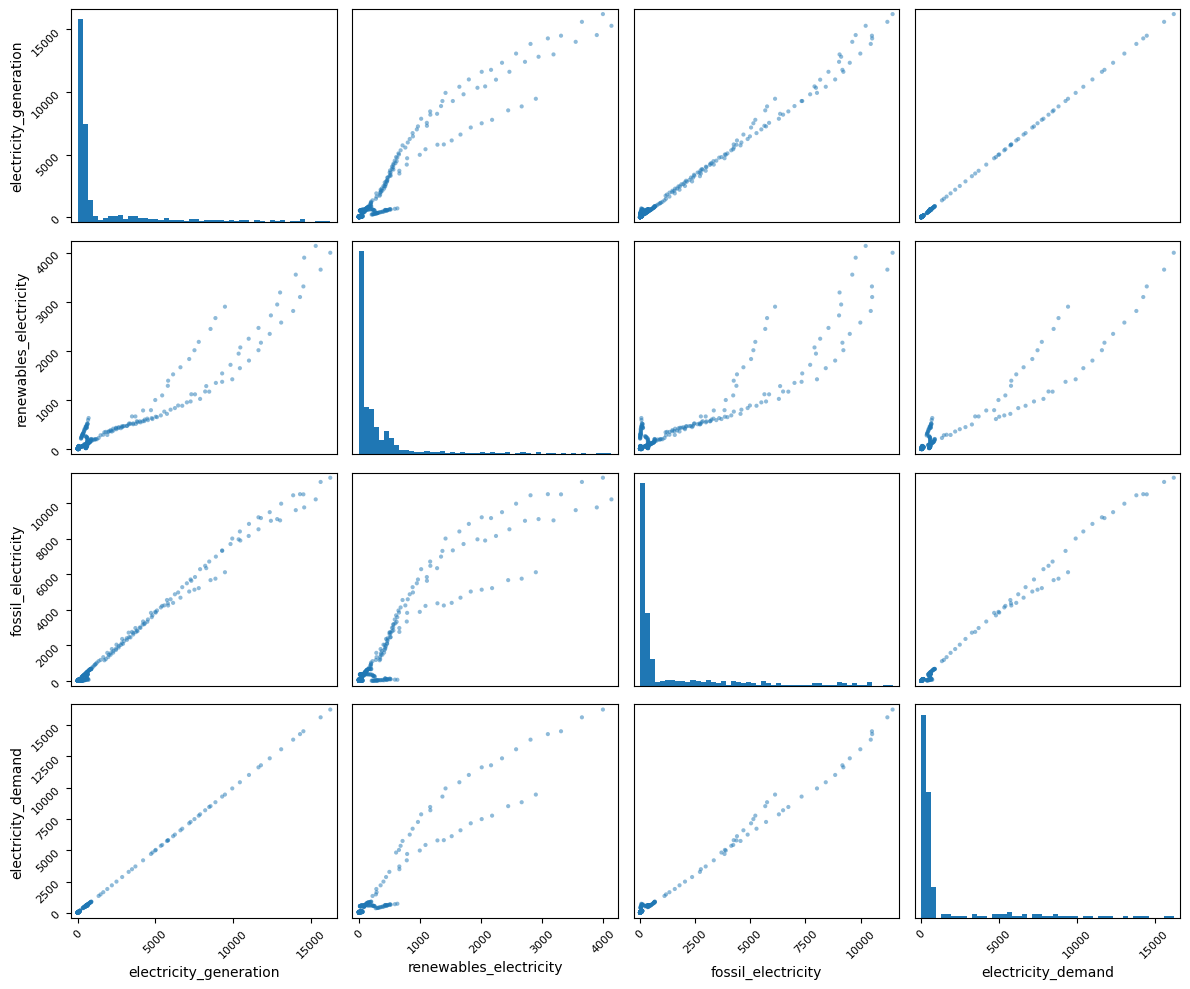

In [273]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

columns = ['country', 'electricity_generation', 'renewables_electricity', 'fossil_electricity', 'electricity_demand']

sm = scatter_matrix(df[columns], figsize=(12,10), hist_kwds={'bins': 50})

for ax in sm.ravel():
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='y', labelrotation=45)

plt.tight_layout()
plt.show()


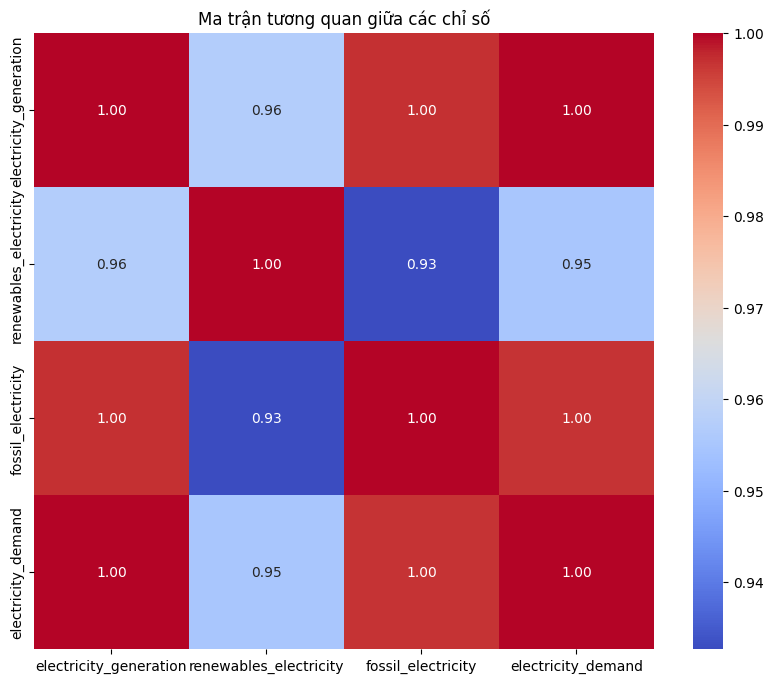

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn các cột có kiểu dữ liệu số
df_numeric = df.select_dtypes(include=[float, int])

# Tính ma trận tương quan với các cột số
corr_matrix = df_numeric.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các chỉ số')
plt.show()



array([[<Axes: title={'center': 'electricity_generation'}>,
        <Axes: title={'center': 'renewables_electricity'}>],
       [<Axes: title={'center': 'fossil_electricity'}>,
        <Axes: title={'center': 'electricity_demand'}>]], dtype=object)

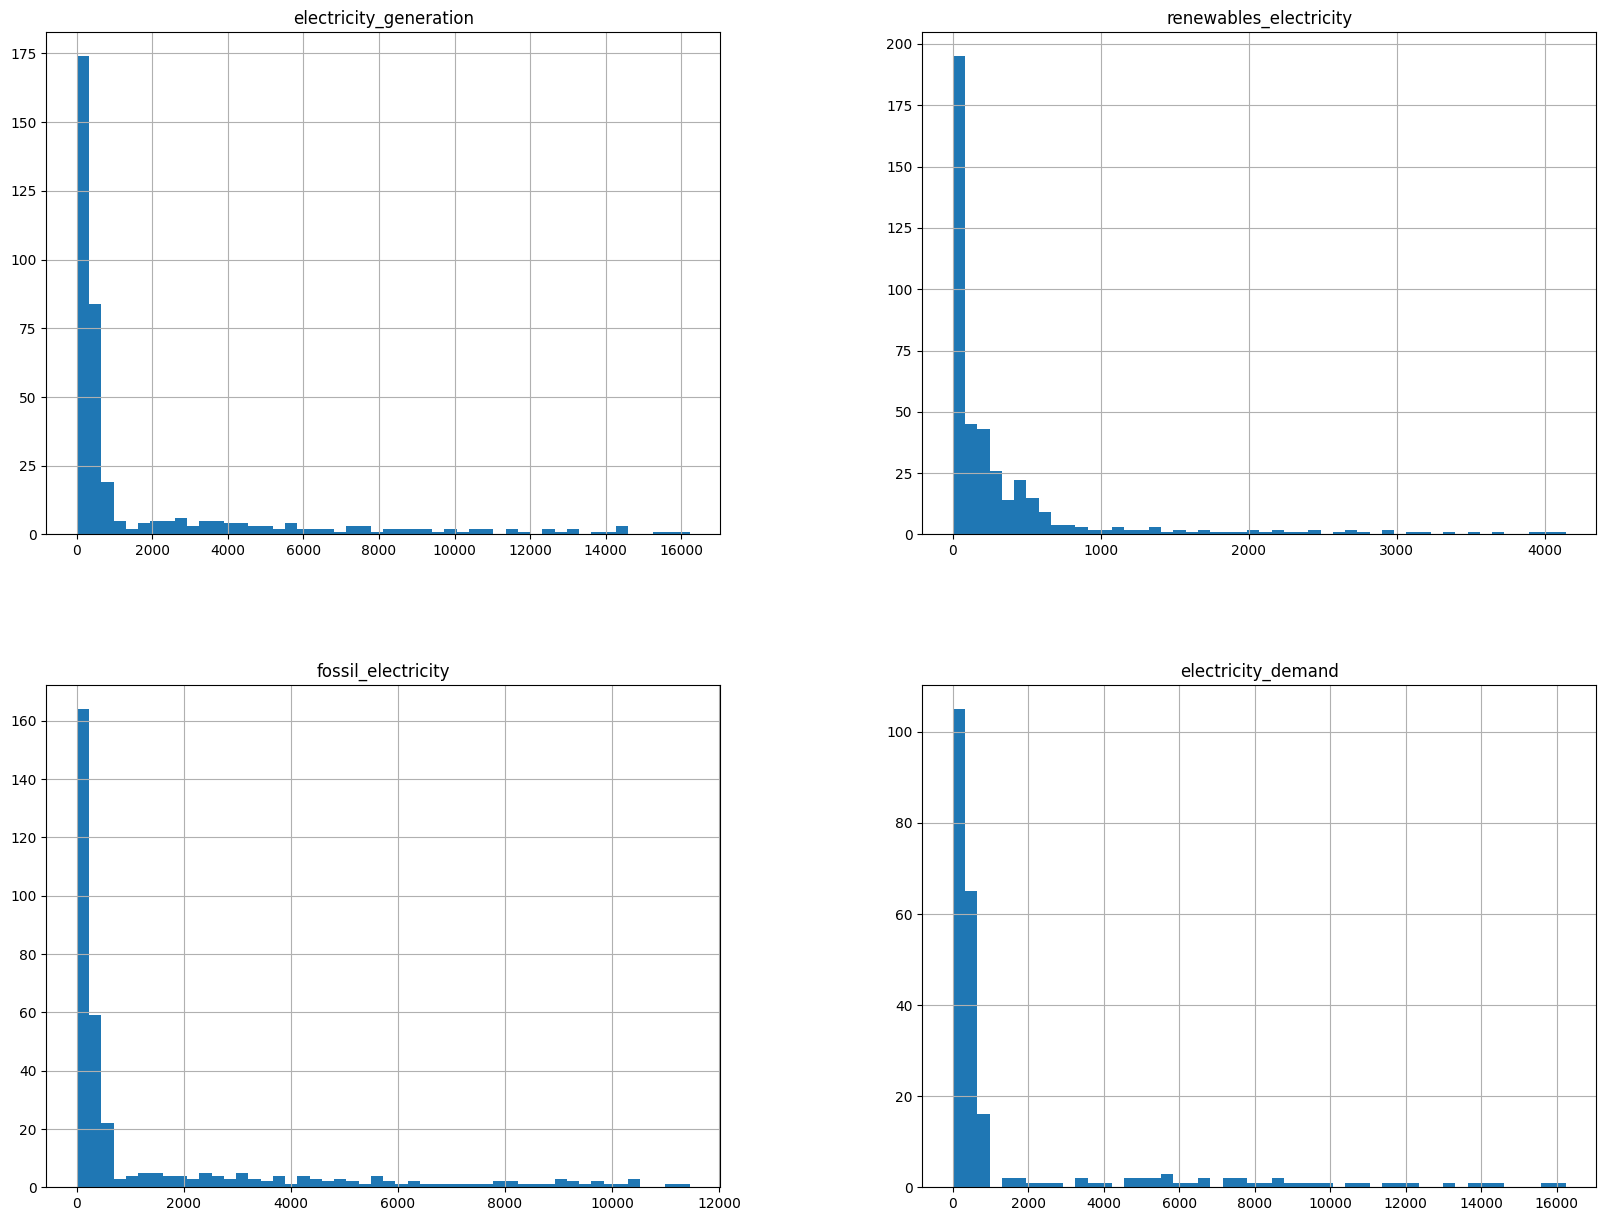

In [275]:
%matplotlib inline
from matplotlib import pyplot as plt

df.hist(bins=50, figsize=(20, 15))

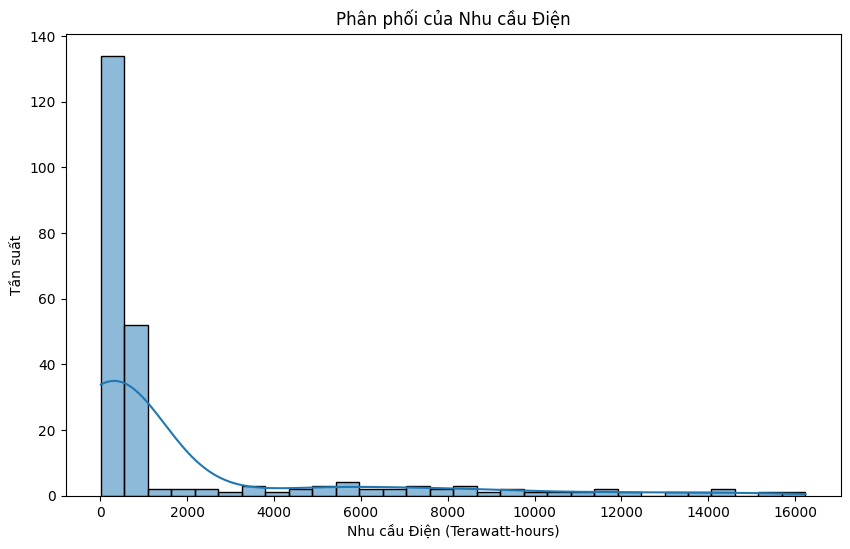

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ phân phối của electricity_demand
plt.figure(figsize=(10,6))
sns.histplot(df['electricity_demand'], kde=True, bins=30)
plt.title('Phân phối của Nhu cầu Điện')
plt.xlabel('Nhu cầu Điện (Terawatt-hours)')
plt.ylabel('Tần suất')
plt.show()


In [277]:
missing_values = df.isnull().sum()

missing_percentage = (df.isnull().mean()) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)


                        Missing Values  Percentage
country                              0    0.000000
electricity_generation              68   15.077605
renewables_electricity              25    5.543237
fossil_electricity                  99   21.951220
electricity_demand                 218   48.337029


In [278]:
df = df[df.index.year >= 1965]

fig, axs = plt.subplots(4, 1, figsize=(15, 16))

columns_to_plot = ['electricity_generation', 'renewables_electricity', 'fossil_electricity', 'electricity_demand']
titles = ['Electricity Generation', 'Renewables Electricity', 'Fossil Electricity', 'Electricity Demand']

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    for country in df['country'].unique():
        df_country = df[df['country'] == country]
        df_country[column].plot(ax=ax, label=country)
    
    ax.set_title(titles[i])
    ax.set_ylabel(column)
    ax.set_xlabel('Year')
    ax.legend(title='Countries', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


AttributeError: 'Index' object has no attribute 'year'